# **TASK 8 | Model of Individual Performance**

* EngagementSurvey: Engaged employees are typically more motivated and productive.
* EmpSatisfaction: Satisfied employees are more committed to their roles and demonstrate greater productivity.
* Salary:  Compensation often reflects role, responsibilities, and experience, which may correlate highly with performance.
* SpecialProjectsCount: Higher count of special projects indicates proactivity and adaptability, suggesting a positive impact on performance.
* ManagerID/ManagerName (+)– Quality of management can moderately impact an employee’s performance but may vary widely.

Integrants:
* A01018289 Renata Díaz Barreiro Castro
* A01795095 Enma Beatriz Galindo Arango
* A01321600 Ignacio Moreda Rovirosa
* A01012223 Victor Arista Beltran

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None) #se muestren todas las filas
pd.set_option('display.max_columns', None)

In [4]:
performance_df = pd.read_csv('/content/drive/MyDrive/Task 8/performance_data.csv')
performance_df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,10/07/83,M,Single,US Citizen,No,White,05/07/11,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,17/01/19,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,30/03/15,16/06/16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,24/02/16,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,19/09/88,F,Married,US Citizen,No,White,05/07/11,24/09/12,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,15/05/12,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,27/09/88,F,Married,US Citizen,No,White,07/01/08,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,03/01/19,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,08/09/89,F,Divorced,US Citizen,No,White,11/07/11,06/09/16,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,01/02/16,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,22/05/77,F,Single,US Citizen,No,White,09/01/12,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,07/01/19,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,24/05/79,F,Single,US Citizen,No,White,10/11/14,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,02/01/19,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,18/02/83,M,Widowed,US Citizen,No,White,30/09/13,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,25/02/19,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,11/02/70,F,Single,US Citizen,No,Black or African American,06/07/09,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,25/01/19,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,07/01/88,M,Divorced,US Citizen,No,White,05/01/15,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,18/02/19,0,16


# **1. Show, for your model:**
* Descriptive statistics (N, Min, Max, Mean, SD).
* Correlation matrix.
* Results of linear regression (p value, R2, constant, coefficients of predictors).

In [5]:
performance_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_Name,311,311,"Adinolfi, Wilson K",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpID,311.0,NaN,NaN,NaN,10156.0,89.922189,10001.0,10078.5,10156.0,10233.5,10311.0
MarriedID,311.0,NaN,NaN,NaN,0.398714,0.490423,0.0,0.0,0.0,1.0,1.0
MaritalStatusID,311.0,NaN,NaN,NaN,0.810289,0.943239,0.0,0.0,1.0,1.0,4.0
GenderID,311.0,NaN,NaN,NaN,0.434084,0.496435,0.0,0.0,0.0,1.0,1.0
EmpStatusID,311.0,NaN,NaN,NaN,2.392283,1.794383,1.0,1.0,1.0,5.0,5.0
DeptID,311.0,NaN,NaN,NaN,4.610932,1.083487,1.0,5.0,5.0,5.0,6.0
PerfScoreID,311.0,NaN,NaN,NaN,2.977492,0.587072,1.0,3.0,3.0,3.0,4.0
FromDiversityJobFairID,311.0,NaN,NaN,NaN,0.093248,0.291248,0.0,0.0,0.0,0.0,1.0
Salary,311.0,NaN,NaN,NaN,69020.684887,25156.63693,45046.0,55501.5,62810.0,72036.0,250000.0


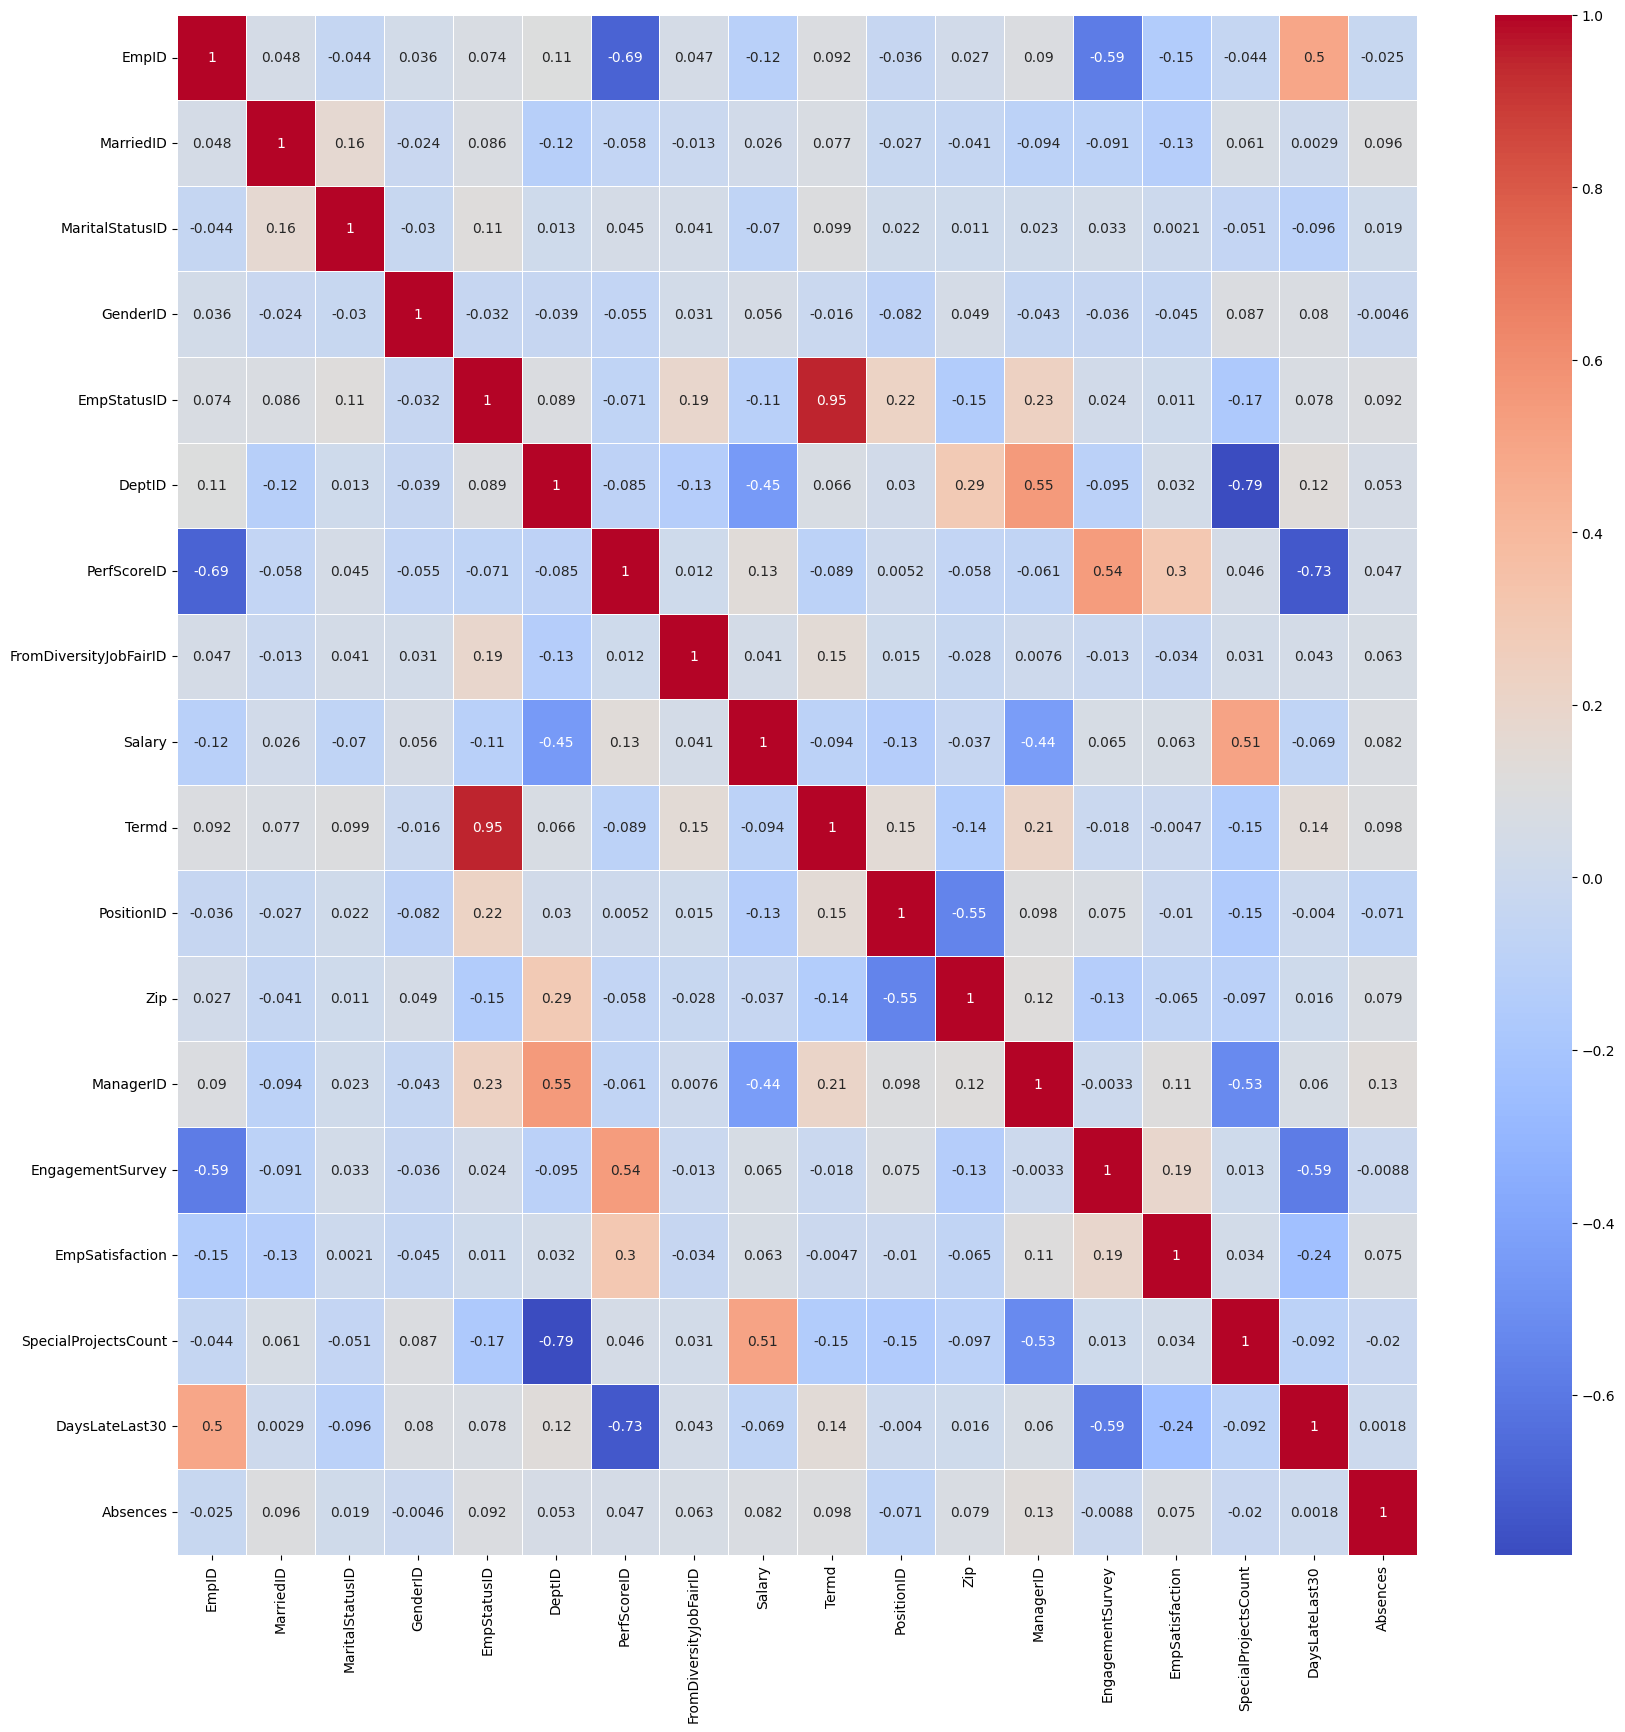

In [6]:
plt.figure(figsize=(20, 20))  # Reduced size for better visualization
sns.heatmap(performance_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [7]:
columnas = performance_df.columns
print("Nombres de las columnas:")
print(columnas)

Nombres de las columnas:
Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')


In [8]:
filas = performance_df.index
print("Nombres de las filas:")
print(filas)

Nombres de las filas:
RangeIndex(start=0, stop=311, step=1)


                      SpecialProjectsCount    Salary  EngagementSurvey  \
SpecialProjectsCount              1.000000  0.508333          0.013227   
Salary                            0.508333  1.000000          0.064966   
EngagementSurvey                  0.013227  0.064966          1.000000   
EmpSatisfaction                   0.033877  0.062718          0.187105   
DaysLateLast30                   -0.092494 -0.069443         -0.585232   
PerfScoreID                       0.045677  0.130903          0.544927   

                      EmpSatisfaction  DaysLateLast30  PerfScoreID  
SpecialProjectsCount         0.033877       -0.092494     0.045677  
Salary                       0.062718       -0.069443     0.130903  
EngagementSurvey             0.187105       -0.585232     0.544927  
EmpSatisfaction              1.000000       -0.235412     0.303579  
DaysLateLast30              -0.235412        1.000000    -0.734728  
PerfScoreID                  0.303579       -0.734728     1.000000 

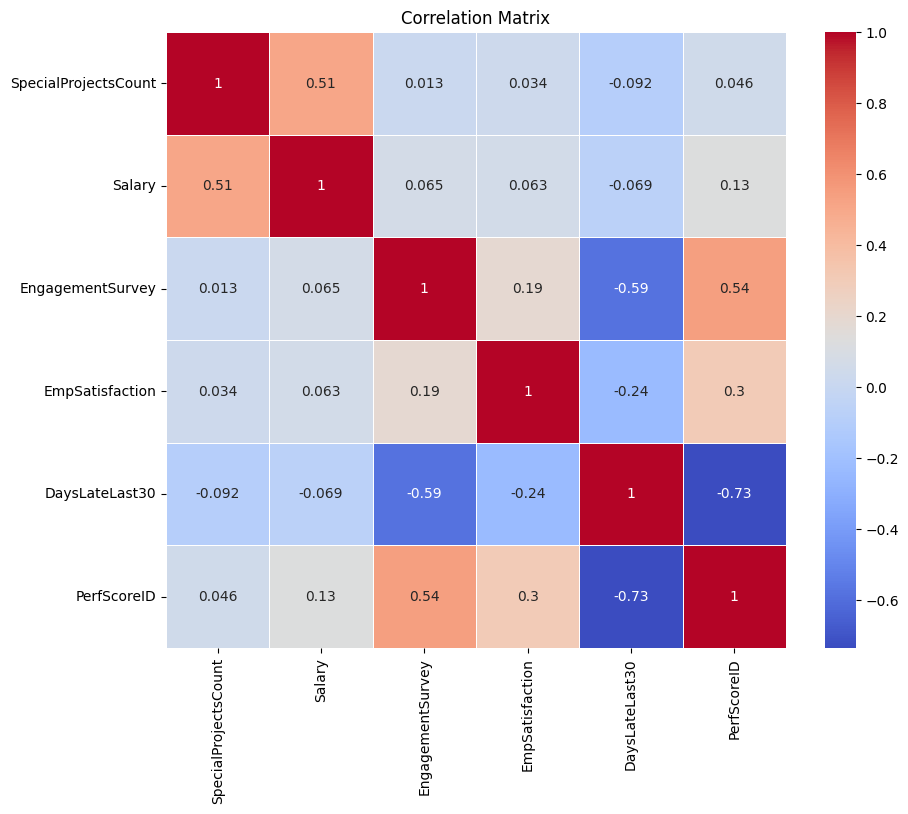

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is `performance_df`
# Selecting relevant columns for correlation
correlation_columns = ['SpecialProjectsCount', 'Salary', 'EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30', 'PerfScoreID']

# Calculate correlation matrix
correlation_matrix = performance_df[correlation_columns].corr()

# Print correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

# Selección de las variables predictoras y la variable objetivo
X = performance_df[['SpecialProjectsCount', 'Salary', 'EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30']]
y = performance_df['PerfScoreID']

# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Ajustar el modelo a los datos
linear_model.fit(X, y)

# Obtener el intercepto y los coeficientes
intercept = linear_model.intercept_
coefficients = linear_model.coef_

# Mostrar la ecuación del modelo
equation = f"β0 = {intercept:.4f}"

# Añadir los coeficientes a la ecuación
for i, coef in enumerate(coefficients):
    equation += f" + β{i+1}P{i+1} ({coef:.4f})"

print("Ecuación del modelo:")
print(equation)

Ecuación del modelo:
β0 = 2.1473 + β1P1 (-0.0179) + β2P2 (0.0000) + β3P3 (0.1167) + β4P4 (0.0812) + β5P5 (-0.2778)


β0 =2.1473: Este es el valor de rendimiento básico cuando todos los demás factores son cero. Es el punto de referencia.

𝛽1=−0.0179. A medida que aumenta el número de proyectos especiales, el rendimiento disminuye.

𝛽2=0.0000. No hay impacto significativo del salario en el rendimiento.

𝛽3=0.1167. Un mayor compromiso de los empleados mejora el rendimiento.

𝛽4=0.0812. Un mayor nivel de satisfacción de los empleados mejora el rendimiento.

𝛽5=−0.2778. Los empleados que llegan tarde con frecuencia tienen un peor rendimiento.



In [20]:
descriptive_stats = performance_df[['SpecialProjectsCount', 'Salary', 'EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30', 'PerfScoreID']].describe()

# Display the descriptive statistics
print(descriptive_stats)

       SpecialProjectsCount         Salary  EngagementSurvey  EmpSatisfaction  \
count            311.000000     311.000000        311.000000       311.000000   
mean               1.218650   69020.684887          4.110000         3.890675   
std                2.349421   25156.636930          0.789938         0.909241   
min                0.000000   45046.000000          1.120000         1.000000   
25%                0.000000   55501.500000          3.690000         3.000000   
50%                0.000000   62810.000000          4.280000         4.000000   
75%                0.000000   72036.000000          4.700000         5.000000   
max                8.000000  250000.000000          5.000000         5.000000   

       DaysLateLast30  PerfScoreID  
count      311.000000   311.000000  
mean         0.414791     2.977492  
std          1.294519     0.587072  
min          0.000000     1.000000  
25%          0.000000     3.000000  
50%          0.000000     3.000000  
75%        

In [18]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and the target (y)
X = performance_df[['SpecialProjectsCount', 'Salary', 'EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30']]
y = performance_df['PerfScoreID']

# Add a constant to the features matrix (this represents β0, the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PerfScoreID   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     85.78
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.53e-56
Time:                        02:26:00   Log-Likelihood:                -138.61
No. Observations:                 311   AIC:                             289.2
Df Residuals:                     305   BIC:                             311.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1473 

# **RESULTS AND ANALYSIS**

**a. Do they make sense?**

Yes, they do. The results make sense based on the variables used. The R-squared (R²) of 0.584 indicates that the model explains 58.4% of the variability in the dependent variable (PerfScoreID), which is not bad for a regression model. However, it is not extremely high, suggesting that there are other factors not considered in the model that also influence employee performance.

**b. Were you expecting this?**

Yes, since some of the variables (such as DaysLateLast30 and Salary) seem to have a moderate correlation with PerfScoreID based on the correlation matrix and descriptive measures. However, some of the variables do not seem to have a very strong impact, such as EngagementSurvey and SpecialProjectsCount, which have a low correlation with PerfScoreID.

**c. What predictors worked well? Why?**

Salary and DaysLateLast30 seem to be good predictors in this case. According to the p-value and magnitude of the coefficients, Salary has a significant positive relationship with performance, which makes sense since employees with higher salaries may feel more motivated and engaged.
DaysLateLast30 has a large and significant negative coefficient, which is also reasonable since employees with more absences or tardiness in the past 30 days may have lower performance.

**d. What predictors did not work well? Why?**

SpecialProjectsCount has a negative coefficient close to zero and a p-value just above 0.05, indicating that it does not have a significant impact on employee performance in this model. Even though it may make sense to think that more special projects indicate higher proactivity, this predictor does not seem to be that influential in this case.
EngagementSurvey has a moderate but not that significant coefficient, indicating that it is not contributing significantly to the model, although the correlation with PerfScoreID is somewhat positive.

**e. What wrong assumptions did you make?**

* All of the selected predictors would have a similar impact on employee performance. However, some, such as SpecialProjectsCount, do not have a significant relationship with performance.
* The correlation between the predictors and performance would directly translate into a strong relationship in the model, but some predictors are not as relevant.

**f. What correct assumptions did you make?**

Salary and DaysLateLast30 might be good predictors of employee performance. This is validated in the analysis, as both have significant and reasonable coefficients. Salary plays a crucial role in employee motivation and performance. Research suggests that adequate salary improves motivation and thus productivity. According to a study in Darmawan, Kusnanto, 2021, a competitive salary positively affects employee performance by increasing their engagement and satisfaction at work. Zahid, 2023, highlights that low remuneration in companies can lead to a decline in employee performance, especially in corporate sector. And similarly, Carter, 2029, underlines how low salaries can negatively affect employee productivity, creating a vicious cycle of low motivation and performance. These studies support the idea that salary is an important predictor of job performance.

**Bibliography:**
* Darmawan, Kusnanto. (2021). SALARY: DOES AFFECT EMPLOYEE MOTIVATION AND PERFORMANCE?. International Journal of Accounting and Management Research. 1. 46-51. 10.30741/ijamr.v1i2.642.
* Rahim, F. (2021). The impact of low salaries on employees' performance in Pakistan’s corporate sector. LinkedIn. https://www.linkedin.com/pulse/impact-low-salaries-employees-performance-pakistans-corporate-rahim
* Carter, S. (2019). The impact of wages on employee productivity. Forbes. https://www.forbes.com/sites/forbesbooksauthors/2019/09/12/the-impact-of-wages-on-employee-productivity/